### KNU 한국어 감성사전 -DI LAB
- SentiWord info.json 한국어 감성사전 제공

In [2]:
import json
import pandas as pd
from tqdm import tqdm


In [3]:
SentiWord = pd.read_json('c:/pydata/sw/SentiWord_info.json')
SentiWord.to_csv('c:/pydata/sw/SentiWord_info.csv', index=False)

ValueError: Expected object or value

In [9]:
SentiWord = pd.read_csv('c:/pydata/sw/SentiWord_info.csv')
word = '알쏭'
SentiWord.loc[len(SentiWord)] = ['징용','징용',-2]
SentiWord.loc[len(SentiWord)] = ['합의','합의',1]
SentiWord.tail()
def pos_neg(word):
    tmp =SentiWord[(SentiWord['word']==word) | (SentiWord['word_root']==word)]
    try:
        word_res = (word,tmp['polarity'][tmp.index[0]])
    except:
        word_res = (word, 0)
    return word_res

In [4]:
pos_neg('알쏭')

NameError: name 'pos_neg' is not defined

In [5]:
df = pd.read_csv('c:/pydata/중앙일보_일본 올림픽.csv', encoding = 'cp949')
txt = ''
for i in df.index:
    txt = txt +' ' +str(df['상세내용'].loc[i])
    
# print(txt)
    

In [10]:
from konlpy.tag import Okt
okt = Okt()
morp = okt.morphs(txt)

# morp

In [11]:
from tqdm import tqdm
pos_list = []
neg_list = []
unkown_list = []

for noun in tqdm(morp, '긍/부정 나누기'):
    word_res = pos_neg(noun)
    if word_res[1] > 0:
        pos_list.append(word_res[0])
    elif word_res[1] < 0 :
        neg_list.append(word_res[0])
    else:
        unkown_list.append(word_res)


긍/부정 나누기: 100%|███████████████████████████████████████████████████████████| 26408/26408 [02:23<00:00, 183.98it/s]


In [12]:
print('긍정키워드 수:', len(pos_list),'개')
print('부정키워드 수:', len(neg_list),'개')
print('중립 또는 모름 키워드 수:', len(unkown_list),'개')

긍정키워드 수: 1267 개
부정키워드 수: 2554 개
중립 또는 모름 키워드 수: 22587 개


In [13]:
from collections import Counter #jdk 제공 모듈

pos_count = dict(Counter(pos_list).most_common()) # 단어별 갯수 계산 및 내림차순 정렬, 딕셔너리 구조
neg_count = dict(Counter(neg_list).most_common())
unkown_count = dict(Counter(unkown_list).most_common())
print(pos_count)
print('========================================')
# print(neg_count)
# print('========================================')
# print(unkown_count)
# print('========================================')

{'로': 191, '것': 148, '와': 85, '당': 49, '명': 48, '위': 48, '성과': 33, '함께': 19, '히': 19, '세': 18, '합의': 18, '개': 17, '사람': 17, '신': 17, '하기': 16, '잘': 15, '정상': 15, '뜻': 13, '자신': 13, '좋은': 12, '점': 12, '개선': 12, '발전': 12, '지적': 11, '최고': 11, '해결': 11, '노력': 10, '열': 9, '추진': 8, '평화': 8, '의지': 8, '용납': 8, '이해': 8, '정': 7, '신뢰': 7, '상당한': 7, '많다': 6, '유': 6, '사랑': 6, '리': 6, '보답': 6, '긍정': 5, '적극': 5, '예': 5, '선전': 5, '축하': 5, '기대': 4, '크다': 4, '인기': 4, '원': 4, '대상': 4, '제대로': 4, '복': 4, '성공': 4, '회복': 4, '친구': 4, '측은': 3, '이기': 3, '인정': 3, '좋다': 3, '자신감': 3, '순': 3, '마스터': 3, '다행': 3, '새로운': 3, '보': 3, '찬양': 3, '타': 3, '재능': 3, '도움': 3, '강화': 3, '하기를': 3, '달성': 2, '젊은': 2, '좋다고': 2, '중요': 2, '높은': 2, '진실': 2, '기뻐': 2, '여유': 2, '열심히': 2, '높이': 2, '능력': 2, '극복': 2, '높다': 2, '강하게': 2, '충분히': 2, '특별': 2, '상승': 2, '동의': 2, '반성': 2, '교훈': 2, '무사히': 2, '중요한': 2, '꾸준히': 2, '뛰어나다': 2, '압도': 2, '믿음': 2, '치료': 2, '희망': 2, '감당': 2, '화해': 2, '쓰': 2, '존중': 2, '안도': 2, '밝은': 2, '수습': 2, '충분': 2, '건전한': 

In [ ]:
#데이터 추가하기!
SentiWord.loc[len(SentiWord)] = ['징용','징용',-2]
SentiWord.loc[len(SentiWord)] = ['합의','합의',1]
SentiWord.tail()


In [17]:
stop_words = '로 것 와 당 명 위 신 사람 하기 뜻 점 순 타 보'
stop_words = stop_words.split(" ")
stop_words

['로', '것', '와', '당', '명', '위', '신', '사람', '하기', '뜻', '점', '순', '타', '보']

In [ ]:
tmp_dic={}
for key, values in pos_count.items():#items()는 딕셔너리 구조를 튜플구조로
    if key not in stop_words:
        tmp_dic[key]=values
pos_count = tmp_dic


In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
### https://www.w3schools.com/colors/colors_hexadecimal.asp
def color_func(**kawargs):
    color="#0b1177"
    return color


In [19]:
img_path = 'c:/pydata/sw/good.jpg'
cloud_mask = np.array(Image.open(img_path))
cloud_mask.shape

(789, 831, 3)

In [ ]:
img = Image.open(img_path)
img.size

In [ ]:
wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(pos_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()


In [15]:
### https://www.w3schools.com/colors/colors_hexadecimal.asp
def color_func2(**kawargs):
    color="#f20101"
    return color

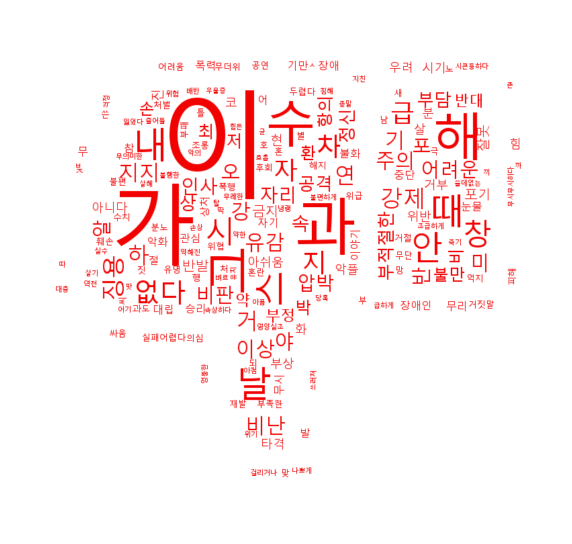

In [20]:
tmp_dic={}
for key, values in neg_count.items():#items()는 딕셔너리 구조를 튜플구조로
    if key not in stop_words:
        tmp_dic[key]=values
neg_count = tmp_dic
img_path = 'c:/pydata/sw/bad.jpg'
cloud_mask = np.array(Image.open(img_path))
cloud_mask.shape
img = Image.open(img_path)
wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(neg_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func2), interpolation='bilinear')
plt.axis("off")
plt.show()
